# Problem 2

## (a)

The real part of the region of absolute stability for this method with our chosen parameters is approximately the interval $[-1.478, 0]$, as calculated and displayed below.

In [1]:
# Adapted from code from class

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Specific coefficients chosen to make method 3rd order
b21 = 1
b31 = 1
b43 = 1/6
b32 = -1/2 + 1j*np.sqrt(3)/2
b42 = 1/3 - 1/6*b32
b41 = 5/6 - b42

In [4]:
def eigenvalue(hl):
    # Test eigenvalues along real axis
    return abs( 1 + (b41+b42+b43)*hl + (b42*b21+b43*b31+b43*b32)*hl**2
              + (b43*b32*b21)*hl**3)  # 3-stage RK method

r = 2
x = np.arange(-r,r, 0.001)
z = eigenvalue(x)

# leftmost point on real axis for which method will converge
left = x[-1]
for i in range(len(x)):
    if z[-i] < 1 and abs(z[-i] - 1) < 1e-2:
        left = x[-i]
        
print(f'left: {left}')

left: -1.4780000000000575


## (b)

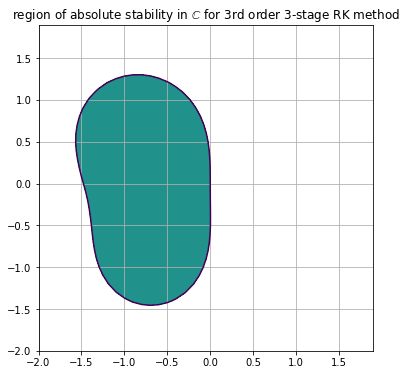

In [3]:
def eigenvalue(hlre,hlim):
    hl = hlre+hlim*1j # form the complex hlambda from real and imaginary part
    return abs( 1 + (b41+b42+b43)*hl + (b42*b21+b43*b31+b43*b32)*hl**2
              + (b43*b32*b21)*hl**3)  # 3-stage RK method

r = 2  # plot box radius
x = np.arange(-r,r, 0.1)
y = np.arange(-r,r, 0.1)
X, Y = np.meshgrid(x, y)  # grid of points to evaluate eigenvalue

Z = eigenvalue(X,Y)

fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(X,Y,Z,levels=[0,1])
ax.contour(X,Y,Z,levels=[1])
plt.grid()
plt.title('region of absolute stability in $\mathbb{C}$ for 3rd order 3-stage RK method')
plt.show()